In [210]:
import pandas as pd
import numpy as np

In [195]:
# Read in the data
df = pd.read_csv('../00_Source/merged_pop_drug_death.csv')

# number of counties per state
df.groupby('State')['County'].nunique()



State
AZ    10
FL    43
GA    42
IL    28
MD    18
NY    38
OH    63
PA    49
TX    56
VA    41
WA    21
WI    21
Name: County, dtype: int64

In [196]:
# total number of counties
df['County'].nunique()

362

In [197]:
# mean death_rate 
df['Deaths'].describe()



count    3320.000000
mean       52.694880
std        78.909943
min        10.000000
25%        14.000000
50%        22.000000
75%        51.000000
max       748.000000
Name: Deaths, dtype: float64

In [198]:
# mean of deaths per county
df.groupby(['State','County'])['Deaths'].mean().sort_values(ascending=True)

State  County             
TX     Ellis County            10.000000
GA     Fannin County           10.000000
TX     Aransas County          10.000000
PA     Mifflin County          10.000000
OH     Hardin County           10.000000
                                 ...    
FL     Broward County         256.769231
TX     Harris County          387.538462
PA     Philadelphia County    400.615385
IL     Cook County            561.153846
AZ     Maricopa County        571.153846
Name: Deaths, Length: 430, dtype: float64

In [199]:
# number of counties with a mean death rate == 10, the minimum
df.groupby(['State','County'])['Deaths'].mean().sort_values(ascending=False).loc[lambda x: x == 10].count()


25

In [211]:
# counties with highest drug death rates by county and state
df.groupby(['State','County'])['death_rate'].mean().sort_values(ascending=False).head(10)

State  County          
VA     Dickenson County    0.000648
OH     Fayette County      0.000489
VA     Buchanan County     0.000473
OH     Pike County         0.000442
GA     Haralson County     0.000441
VA     Lee County          0.000437
TX     Aransas County      0.000427
GA     Madison County      0.000423
       Fannin County       0.000421
VA     Russell County      0.000406
Name: death_rate, dtype: float64

In [201]:
# counties with highest drug death rates by county and state
df.groupby(['State','County'])['Deaths'].mean().sort_values(ascending=False).head(10)

State  County             
AZ     Maricopa County        571.153846
IL     Cook County            561.153846
PA     Philadelphia County    400.615385
TX     Harris County          387.538462
FL     Broward County         256.769231
WA     King County            248.615385
PA     Allegheny County       239.230769
FL     Palm Beach County      234.461538
TX     Dallas County          232.538462
FL     Pinellas County        213.461538
Name: Deaths, dtype: float64

In [202]:
# subset for each state and their controls
flor_cont = df[df['State'].isin(['FL','PA','OH','GA'])].copy()
wash_cont = df[df['State'].isin(['WA','AZ','MD','WI'])].copy()
texas_cont = df[df['State'].isin(['TX','IL','NY','VA'])].copy()

# make sure the shapes from the 3 groups add up to the total in df
assert len(flor_cont) + len(wash_cont) + len(texas_cont) == len(df)


In [203]:
# indicator for each state depending on whether they had a policy enacted or not
flor_cont['case'] = np.where(flor_cont['State'] == 'FL', 'Policy', 'No policy')
wash_cont['case'] = np.where(wash_cont['State'] == 'WA', 'Policy', 'No policy')
texas_cont['case'] = np.where(texas_cont['State'] == 'TX', 'Policy', 'No policy')

# merge the 3 groups into one dataframe
merged_test = pd.concat([flor_cont, wash_cont, texas_cont])

In [204]:

# another indicator for when policy took effect(pre/post)

flor_cont['policy'] = np.where(flor_cont['Year'] >= 2010, 'post', 'pre')
wash_cont['policy'] = np.where(wash_cont['Year'] >= 2011, 'post', 'pre')
texas_cont['policy'] = np.where(texas_cont['Year'] >= 2007, 'post', 'pre')

In [205]:
flor_cont.head()

,County,Year,State,Deaths,Population,death_rate,case,policy
0,Adams County,2009,PA,12.0,101252.0,0.000119,No policy,pre
1,Adams County,2010,PA,10.0,101407.0,0.000099,No policy,post
2,Adams County,2012,OH,10.0,28288.0,0.000354,No policy,post
3,Adams County,2014,OH,10.0,28060.0,0.000356,No policy,post
5,Adams County,2015,OH,13.0,27919.0,0.000466,No policy,post


In [206]:

flor_cont.groupby(['case','policy'])['death_rate'].describe()


count      mean       std       min       25%       50%  \
case      policy                                                            
No policy post    650.0  0.000186  0.000092  0.000047  0.000117  0.000170   
          pre     502.0  0.000123  0.000062  0.000027  0.000077  0.000109   
Policy    post    217.0  0.000149  0.000064  0.000039  0.000105  0.000141   
          pre     233.0  0.000143  0.000059  0.000039  0.000102  0.000141   

                       75%       max  
case      policy                      
No policy post    0.000230  0.000572  
          pre     0.000153  0.000455  
Policy    post    0.000186  0.000408  
          pre     0.000176  0.000359

In [207]:
wash_cont.groupby(['case','policy'])['death_rate'].describe()
# seing the same trend for washington

count      mean       std       min       25%       50%  \
case      policy                                                            
No policy post    185.0  0.000157  0.000075  0.000044  0.000106  0.000141   
          pre     222.0  0.000117  0.000066  0.000019  0.000072  0.000104   
Policy    post     79.0  0.000139  0.000047  0.000057  0.000103  0.000135   
          pre     119.0  0.000132  0.000054  0.000043  0.000090  0.000129   

                       75%       max  
case      policy                      
No policy post    0.000198  0.000512  
          pre     0.000149  0.000402  
Policy    post    0.000165  0.000264  
          pre     0.000160  0.000307

In [208]:
texas_cont.groupby(['case','policy'])['death_rate'].describe()

count      mean       std       min       25%       50%  \
case      policy                                                            
No policy post    543.0  0.000131  0.000087  0.000031  0.000079  0.000108   
          pre     140.0  0.000107  0.000099  0.000008  0.000055  0.000076   
Policy    post    320.0  0.000103  0.000050  0.000018  0.000072  0.000095   
          pre     110.0  0.000100  0.000066  0.000014  0.000060  0.000090   

                       75%       max  
case      policy                      
No policy post    0.000153  0.000689  
          pre     0.000113  0.000578  
Policy    post    0.000122  0.000355  
          pre     0.000114  0.000427

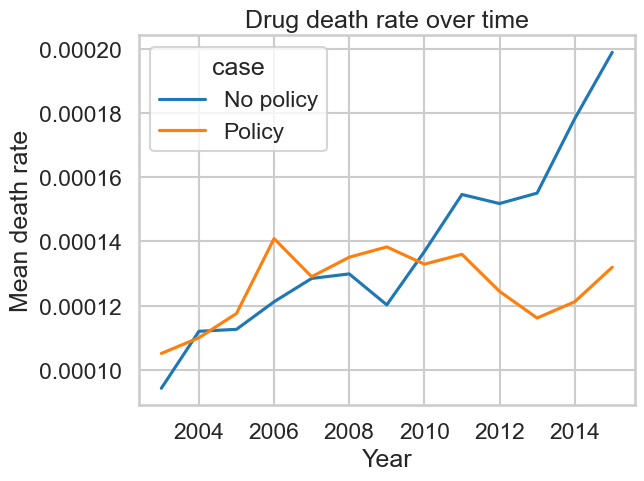

In [209]:
# states death trends over time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

#death rate over time for all states depending on whether they had a policy or not

merged_test.groupby(['Year','case'])['death_rate'].mean().unstack().plot()
plt.title('Drug death rate over time')
plt.ylabel('Mean death rate')
plt.xlabel('Year')
plt.show()

